In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

# Forest fires in Montesinho Park

# Introduction:

The emergence of an early warning system for forest fires becomes imperative due to the devastating effects they bring, including the destruction of wildlife habitats and animal life, infrastructure damage, the release of toxic gasses into the atmosphere, and the potential loss of human lives. This need is further underscored by the increased risk and scale of forest fires in numerous regions globally, which can be attributed to the profound impact of climate change. We will be studying this using a dataset containing data pertaining to forest fires that occurred in Montesinho Park between January 2000 and December 2003 The question we will attempt to answer in with our project is “What is the relationship between the variables FFMC, DMC, DC, ISI, temperature, relative humidity, wind speed, and rainfall, and the extent of damage and area affected by forest fires within a specific geographic area?”


# Preliminary exploratory data analysis:

**Dataset/Table:**

In [2]:
url <- "https://raw.githubusercontent.com/perdomopatrick/group7/main/forestfires.csv"
data <- read_csv(url)

clean_data <- data|>
      mutate(size = ifelse(area > 200, "Large", "Small")) |>
      select(-X,-Y,-month,-day)
clean_data

Rows: 517 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): month, day
dbl (11): X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,Small
90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,Small
90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,Small
91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,Small
89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,Small
92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0,Small
92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0,Small
91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0,Small
91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0,Small


**Data Visualization**

In [3]:
set.seed(1133) 

data_split <- initial_split(clean_data, prop = 0.75, strata = area)
data_training <- training(data_split)
data_testing <- testing(data_split)

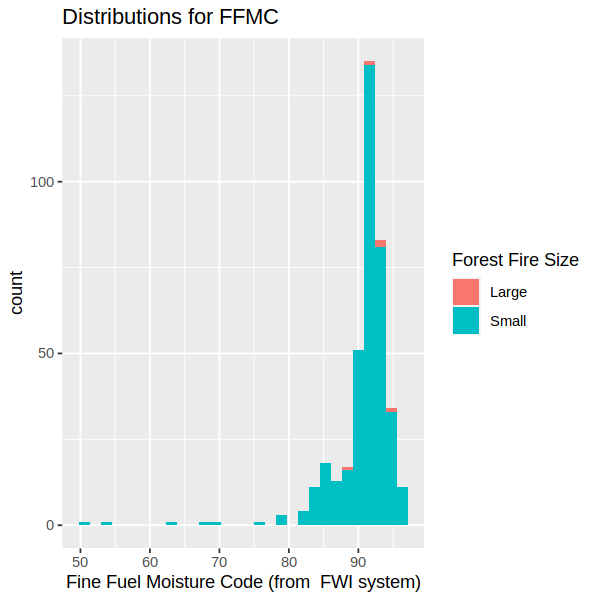

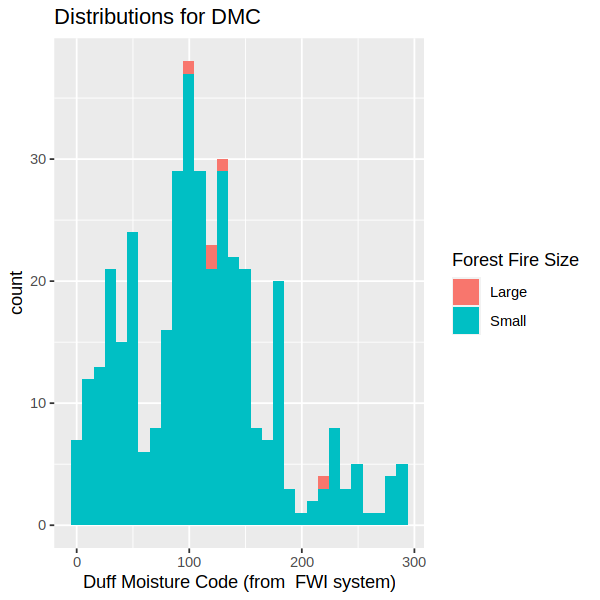

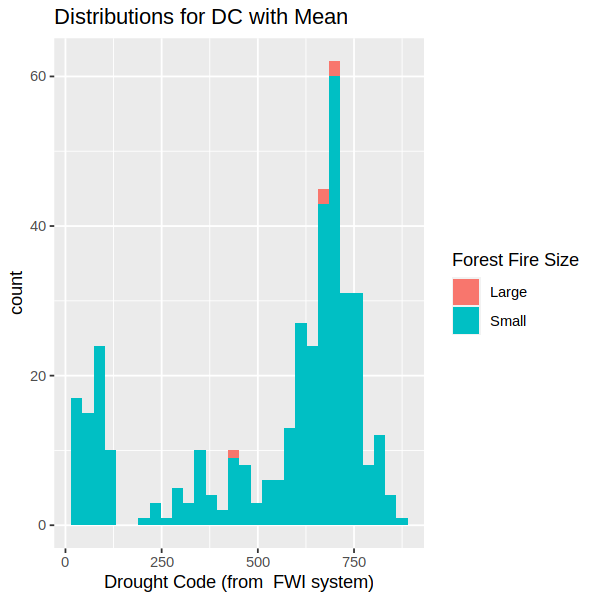

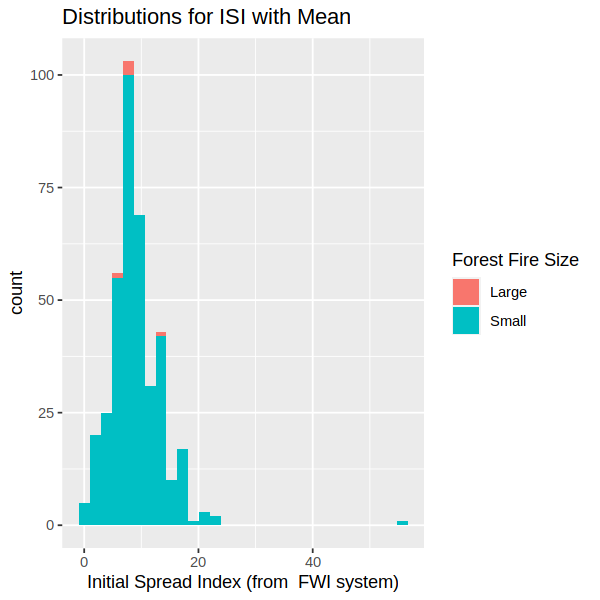

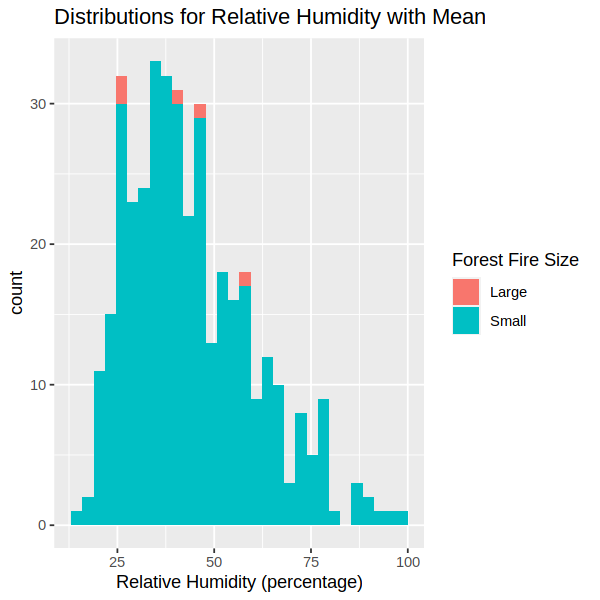

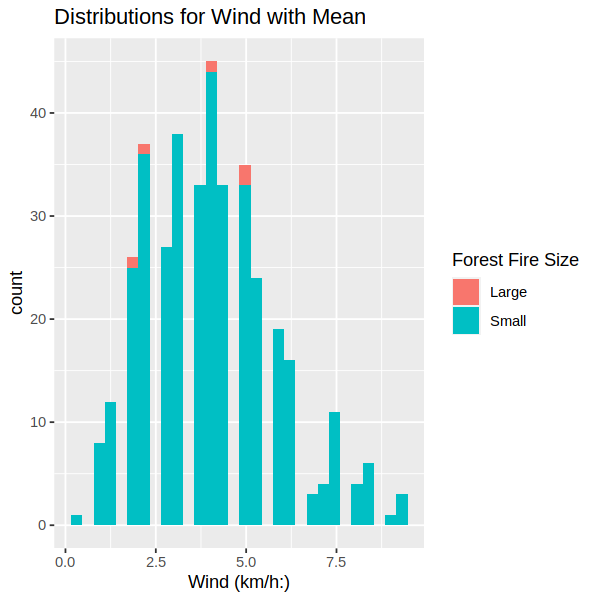

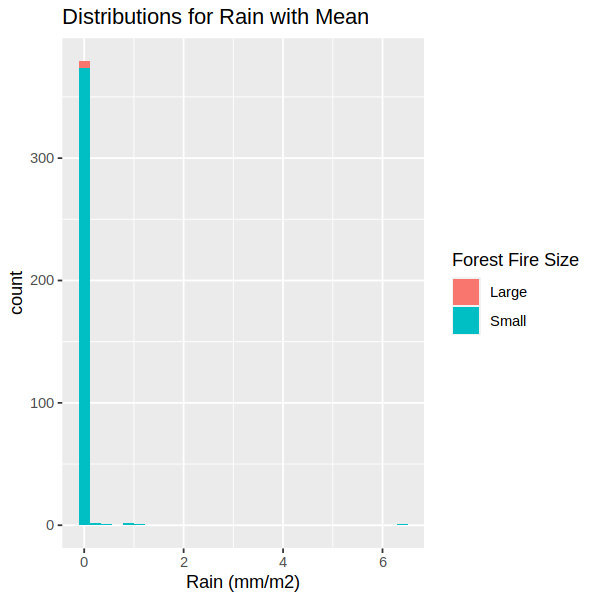

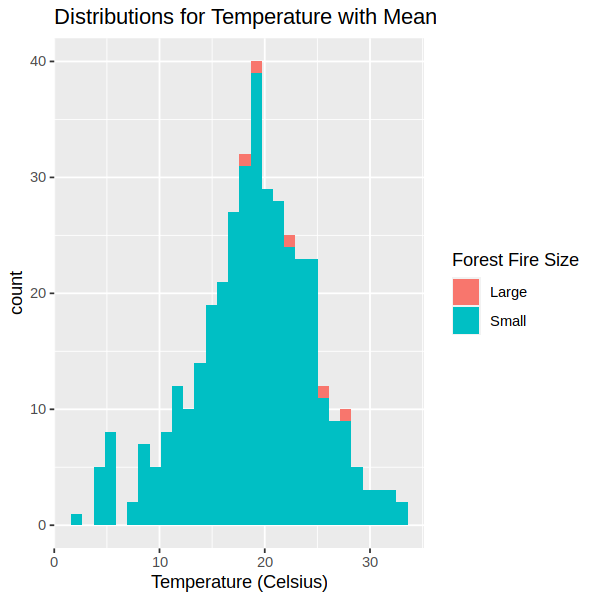

In [4]:
options(repr.plot.height = 5, repr.plot.width = 5)

data_training_histogram <- ggplot(data_training, aes(x=FFMC, fill =size))+
    geom_histogram(bins = 30)+
    labs(title = "Distributions for FFMC",x = "Fine Fuel Moisture Code (from  FWI system)", fill = "Forest Fire Size")
data_training_histogram

data_training_histogram2 <- ggplot(data_training, aes(x=DMC, fill =size))+
    geom_histogram(bins = 30)+
  labs(title = "Distributions for DMC",x  = "Duff Moisture Code (from  FWI system)", fill = "Forest Fire Size")
data_training_histogram2

data_training_histogram3 <- ggplot(data_training, aes(x=DC, fill =size))+
    geom_histogram(bins = 30)+
  labs(title = "Distributions for DC with Mean",x= "Drought Code (from  FWI system)", fill = "Forest Fire Size")
data_training_histogram3

data_training_histogram4 <- ggplot(data_training, aes(x=ISI, fill =size))+
    geom_histogram(bins = 30)+
  labs(title = "Distributions for ISI with Mean",x = "Initial Spread Index (from  FWI system)", fill = "Forest Fire Size")
data_training_histogram4

data_training_histogram5 <- ggplot(data_training, aes(x=RH, fill =size))+
    geom_histogram(bins = 30)+
  labs(title = "Distributions for Relative Humidity with Mean",x = "Relative Humidity (percentage)", fill = "Forest Fire Size")
data_training_histogram5

data_training_histogram6 <- ggplot(data_training, aes(x=wind, fill =size))+
    geom_histogram(bins = 30)+
  labs(title = "Distributions for Wind with Mean",x = "Wind (km/h:)", fill = "Forest Fire Size")
data_training_histogram6

data_training_histogram7 <- ggplot(data_training, aes(x=rain, fill =size))+
    geom_histogram(bins = 30)+
  labs(title = "Distributions for Rain with Mean",x = "Rain (mm/m2)", fill = "Forest Fire Size")
data_training_histogram7

data_training_histogram8 <- ggplot(data_training, aes(x=temp, fill =size))+
    geom_histogram(bins = 30)+
  labs(title = "Distributions for Temperature with Mean",x = "Temperature (Celsius)", fill = "Forest Fire Size")
data_training_histogram8


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


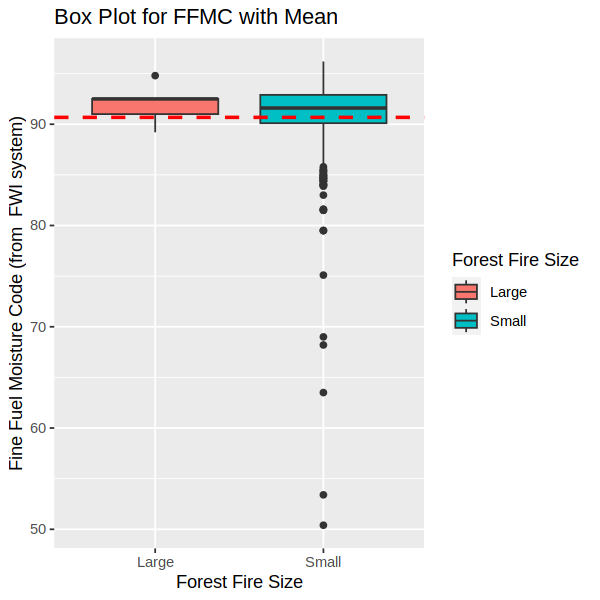

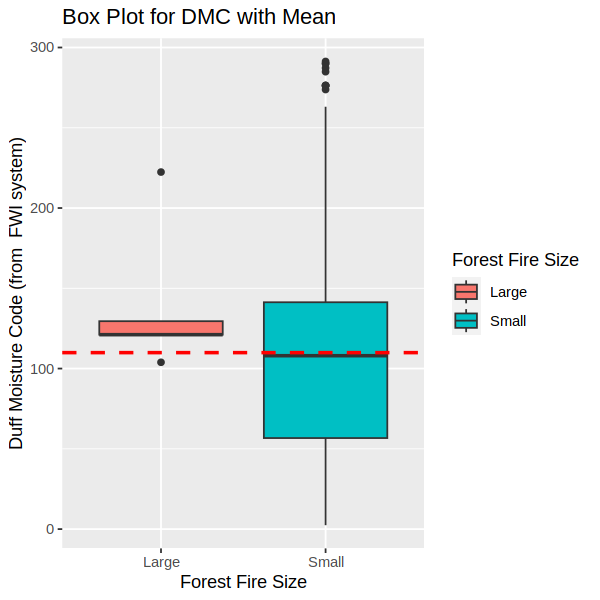

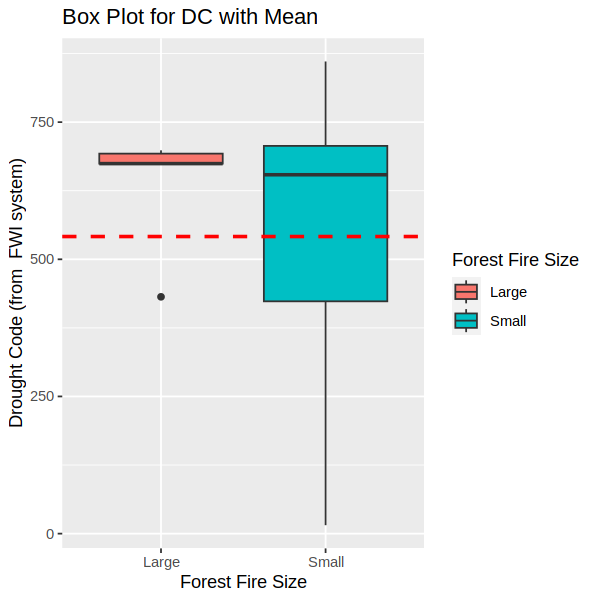

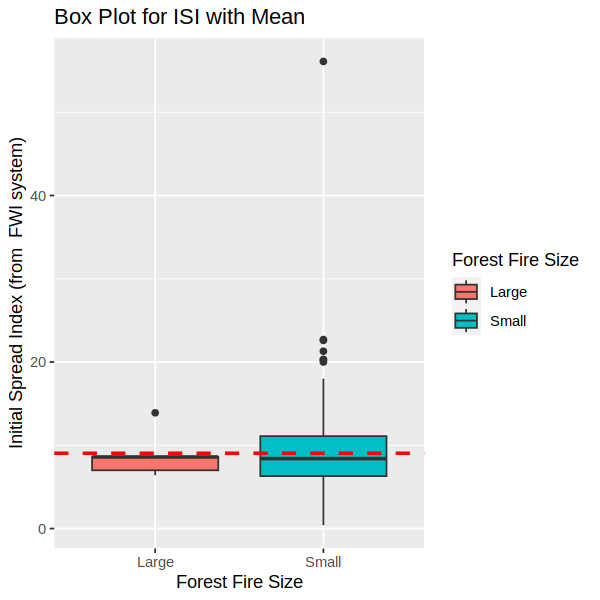

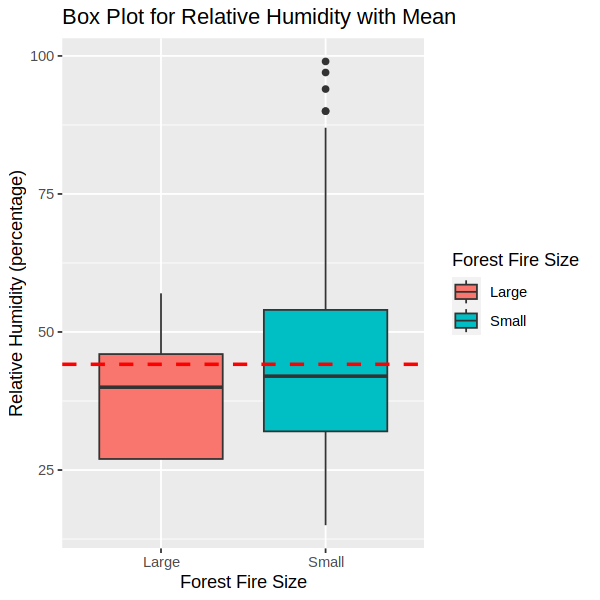

In [ ]:
data_training_plot <- ggplot(data_training, aes(x = size, y = FFMC, fill =size)) +
  geom_boxplot() +
  geom_hline(aes(yintercept = mean(FFMC)), color = "red", linetype = "dashed", size = 1) +
  labs(title = "Box Plot for FFMC with Mean",x = "Forest Fire Size", y = "Fine Fuel Moisture Code (from  FWI system)", fill = "Forest Fire Size")
data_training_plot

data_training_plot2 <- ggplot(data_training, aes(x = size, y = DMC, fill =size)) +
  geom_boxplot() +
  geom_hline(aes(yintercept = mean(DMC)), color = "red", linetype = "dashed", size = 1) +
  labs(title = "Box Plot for DMC with Mean",x = "Forest Fire Size", y = "Duff Moisture Code (from  FWI system)", fill = "Forest Fire Size")
data_training_plot2

data_training_plot3 <- ggplot(data_training, aes(x = size, y = DC, fill =size)) +
  geom_boxplot() +
  geom_hline(aes(yintercept = mean(DC)), color = "red", linetype = "dashed", size = 1) +
  labs(title = "Box Plot for DC with Mean",x = "Forest Fire Size", y = "Drought Code (from  FWI system)", fill = "Forest Fire Size")
data_training_plot3

data_training_plot4 <- ggplot(data_training, aes(x = size, y = ISI, fill =size)) +
  geom_boxplot() +
  geom_hline(aes(yintercept = mean(ISI)), color = "red", linetype = "dashed", size = 1) +
  labs(title = "Box Plot for ISI with Mean",x = "Forest Fire Size", y = "Initial Spread Index (from  FWI system)", fill = "Forest Fire Size")
data_training_plot4

data_training_plot5 <- ggplot(data_training, aes(x = size, y = RH, fill =size)) +
  geom_boxplot() +
  geom_hline(aes(yintercept = mean(RH)), color = "red", linetype = "dashed", size = 1) +
  labs(title = "Box Plot for Relative Humidity with Mean",x = "Forest Fire Size", y = "Relative Humidity (percentage)", fill = "Forest Fire Size")
data_training_plot5

data_training_plot6 <- ggplot(data_training, aes(x = size, y = wind, fill =size)) +
  geom_boxplot() +
  geom_hline(aes(yintercept = mean(wind)), color = "red", linetype = "dashed", size = 1) +
  labs(title = "Box Plot for Wind with Mean",x = "Forest Fire Size", y = "Wind (km/h:)", fill = "Forest Fire Size")
data_training_plot6

data_training_plot7 <- ggplot(data_training, aes(x =size, y = rain, fill =size)) +
  geom_boxplot() +
  geom_hline(aes(yintercept = mean(rain)), color = "red", linetype = "dashed", size = 1) +
  labs(title = "Box Plot for Rain with Mean",x = "Forest Fire Size", y = "Rain (mm/m2)", fill = "Forest Fire Size")
data_training_plot7

data_training_plot8 <- ggplot(data_training, aes(x = size, y = temp, fill =size)) +
  geom_boxplot() +
  geom_hline(aes(yintercept = mean(temp)), color = "red", linetype = "dashed", size = 1) +
  labs(title = "Box Plot for Temperature with Mean",x = "Forest Fire Size", y = "Temperature (Celsius)", fill = "Forest Fire Size")
data_training_plot8

# Methods

We will be working with a dataset containing data in relation to forest fires that took place in Montesinho Park between January 2000 and December 2003. The dataset contains a wide spread of information pertaining to the environmental factors present when fires occurred, such as area burned,  the Duff Moisture code (DMC- measure of moisture/dryness of organic material at forest floor), Fine Fuel Moisture Code (FFMC- a measure of the moisture levels of grass and leaves in the park), temperature, relative humidity, wind etc. Using data from these variables, we will be using the classification mode of the K- nearest neighbors function to to analyze and try to answer the question of “What is the relationship between the variables FFMC, DMC, DC, ISI, temperature, relative humidity, wind speed, and rainfall, and the extent of damage and area affected by forest fires within a specific geographic area?”

- Histograms
  - Data Distribution
    - Range (limits)
    - Trend (differences)
    - Variability (clusters or scatters)
    - Outliers (outside of distribution)
    
<!-- -->

- Box plots
  - Which variable are useless and will not be a predictor
    - If variable does not change between class of fire
  - The mean of the variables between fire types
    - Understand the relationship between variable and fire size
    - How x variables affect the outcome of fire size
  - The mean of the variables
    - What is the average 

# Expected outcomes and significance:

**What do you expect to find?**
- Conditions for a large wildfire.

**What impact could such findings have?**
- A deeper understanding in wildfires can help with the prevention of wildfires.

**What future questions could this lead to?**
- Can these findings be used in other regions of the world (outside of Montesinho Park)?
